In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# Data preprocessing
## Import

In [2]:
dataset = pd.read_csv('data/Speed Dating Data.csv', encoding='ISO-8859-1')
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
print(f'The dataset contains {dataset.shape[0]} rows and {dataset.shape[1]} columns')

The dataset contains 8378 rows and 195 columns


Let's observe some basic statistics. The table below shows that there are lots of missing values in our datasets. We should analyse this further and see if we can drop some columns and herefore make our analysis simpler.

In [4]:
print(dataset.describe().T.to_string())

           count        mean         std    min     25%     50%      75%     max
iid       8378.0  283.675937  158.583367   1.00  154.00  281.00  407.000  552.00
id        8377.0    8.960248    5.491329   1.00    4.00    8.00   13.000   22.00
gender    8378.0    0.500597    0.500029   0.00    0.00    1.00    1.000    1.00
idg       8378.0   17.327166   10.940735   1.00    8.00   16.00   26.000   44.00
condtn    8378.0    1.828837    0.376673   1.00    2.00    2.00    2.000    2.00
wave      8378.0   11.350919    5.995903   1.00    7.00   11.00   15.000   21.00
round     8378.0   16.872046    4.358458   5.00   14.00   18.00   20.000   22.00
position  8378.0    9.042731    5.514939   1.00    4.00    8.00   13.000   22.00
positin1  6532.0    9.295775    5.650199   1.00    4.00    9.00   14.000   22.00
order     8378.0    8.927668    5.477009   1.00    4.00    8.00   13.000   22.00
partner   8378.0    8.963595    5.491068   1.00    4.00    8.00   13.000   22.00
pid       8368.0  283.863767

First of all, there seems to be lots of null values in this datasets. We will look at dropping columns with too many missing values.
Secondly, we have lots of columns ! We will discard all columns ending by "_3". We are interested in knowing how to get a match at the end of the speed dating but all these columns are related to a questionnaire sent 3 weeks after the speed dating. Let's drop them to make the analysis simpler.

Let's take a closer look at the missing values of our dataset by calculting the percentage of missing values for each features.

## Drop columns with missing values

In [5]:
def missing_values(dataset):
    perc_missing = dataset.isnull().sum() * 100 / dataset.shape[0]
    perc_missing_df = pd.DataFrame({'feature' :perc_missing.index, 'perc_missing': perc_missing}).reset_index(drop=True)
    perc_missing_df.sort_values(by='perc_missing', ascending=False, inplace=True)
    return perc_missing_df 

In [6]:
perc_missing_df = missing_values(dataset)
perc_missing_df.head(50)

,feature,perc_missing
160,num_in_3,92.026737
159,numdat_3,82.143710
68,expnum,78.515159
123,sinc7_2,76.665075
126,amb7_2,76.665075
127,shar7_2,76.438291
122,attr7_2,76.318931
124,intel7_2,76.318931
125,fun7_2,76.318931
194,amb5_3,75.936978


It looks like lots of columns with missing values are ending with "_3", "_2" or "_s". They are responses to a survey filled by candidates half way through the night the day after and a few weeks later. It looks like lots of candidates did not reply to these surveys. Let's drop these columns

In [7]:
columns_to_drop = [column for column in dataset.columns if (column.endswith('_2') or column.endswith('_s') or column.endswith('_3'))]
dataset.drop(columns = columns_to_drop, inplace=True)

If we now look at our missing values dataframe, we can still see that some columns have lots of them. Let's drop all the columns with more than 25% of missing values.

In [8]:
perc_missing_df=missing_values(dataset)
perc_missing_df.head(25)

,feature,perc_missing
68,expnum,78.515159
37,mn_sat,62.604440
38,tuition,57.233230
110,them_cal,52.566245
109,you_call,52.566245
44,income,48.925758
93,sinc5_1,41.441872
95,fun5_1,41.441872
94,intel5_1,41.441872
92,attr5_1,41.441872


In [9]:
columns_to_drop = perc_missing_df.loc[perc_missing_df['perc_missing'] > 25, 'feature'].tolist()
dataset.drop(columns = columns_to_drop, inplace=True)
dataset.shape

(8378, 99)

We dropped almost half the columns of our dataset

# Who goes to speed dating ?
## Gender and Race

There are a good balance between women and men. However it is very imbalanced between races. Most subjects are White americans. 

In [10]:
dataset['field_cd'].fillna(-1, inplace=True)
dataset['race'].fillna(-1, inplace=True)
dataset['goal'].fillna(-1, inplace=True)
dataset['career_c'].fillna(-1, inplace=True)

unique_persons = dataset.groupby(by=['iid'], as_index=False).first()

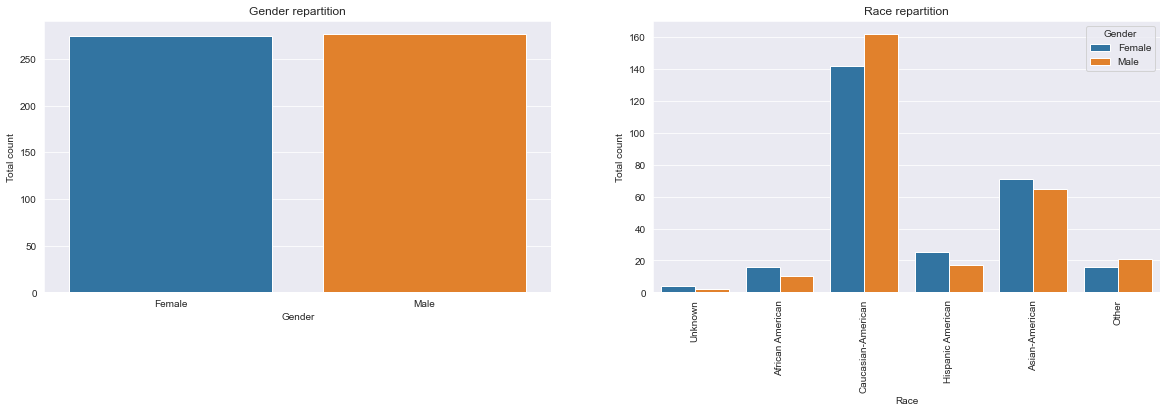

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Gender repartition
sns.countplot(data=unique_persons, x='gender', ax=axes[0])
axes[0].set(xlabel='Gender', ylabel='Total count', title='Gender repartition')
axes[0].set_xticklabels(['Female', 'Male']);

# Race repartition
sns.countplot(data=unique_persons, x='race', hue='gender', ax=axes[1])
axes[1].set(xlabel='Race', ylabel='Total count', title='Race repartition')
axes[1].set_xticklabels(['Unknown','African American', 'Caucasian-American', 'Hispanic American', 'Asian-American', 'Other'], rotation=90)
axes[1].legend(title='Gender', labels=['Female', 'Male']);

## Field of study and carreer

The majority of men studied Business/Economy and Finance and works in the Banking/Finance/Consulting & Co sector. Women mostly work in Academy/Research. 

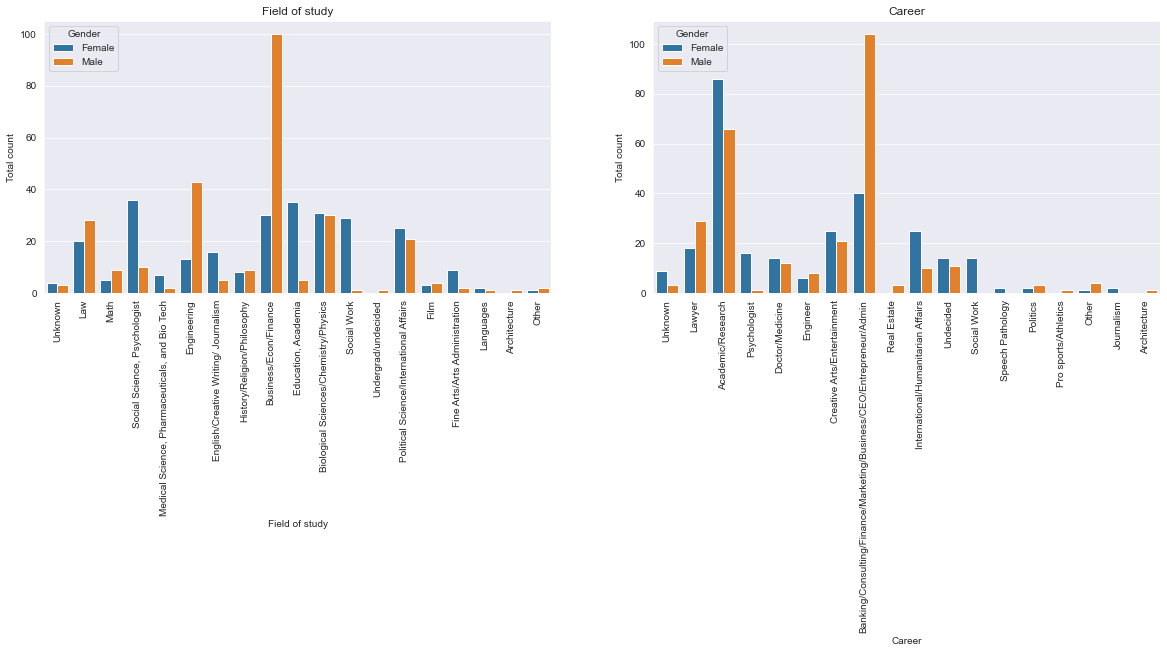

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Field of study
field_cd = ['Unknown',
'Law',  
'Math',
'Social Science, Psychologist',
'Medical Science, Pharmaceuticals, and Bio Tech', 
'Engineering',  
'English/Creative Writing/ Journalism',
'History/Religion/Philosophy', 
'Business/Econ/Finance',
'Education, Academia', 
'Biological Sciences/Chemistry/Physics',
'Social Work', 
'Undergrad/undecided', 
'Political Science/International Affairs', 
'Film',
'Fine Arts/Arts Administration',
'Languages',
'Architecture',
'Other']

sns.countplot(data=unique_persons, x='field_cd', hue='gender', ax=axes[0])
axes[0].set(xlabel='Field of study', ylabel='Total count', title='Field of study')
axes[0].set_xticklabels(field_cd, rotation=90)
axes[0].legend(title='Gender', labels=['Female', 'Male']);

# Career
career_c = ['Unknown',
'Lawyer', 
'Academic/Research', 
'Psychologist', 
'Doctor/Medicine', 
'Engineer', 
'Creative Arts/Entertainment', 
'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin', 
'Real Estate', 
'International/Humanitarian Affairs', 
'Undecided', 
'Social Work',
'Speech Pathology',
'Politics',
'Pro sports/Athletics',
'Other',
'Journalism',
'Architecture']

sns.countplot(data=unique_persons, x='career_c', hue='gender', ax=axes[1]).set(title='Career')
axes[1].set(xlabel='Career', ylabel='Total count', title='Career')
axes[1].set_xticklabels(career_c, rotation=90)
axes[1].legend(title='Gender', labels=['Female', 'Male']);

## Interests and hobbies

In [13]:
activities = ['sports', 'tvsports','exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing','reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping','yoga']
mean_activities = unique_persons.groupby(by='gender')[activities].mean().T
mean_activities.columns = ['mean_female', 'mean_male']

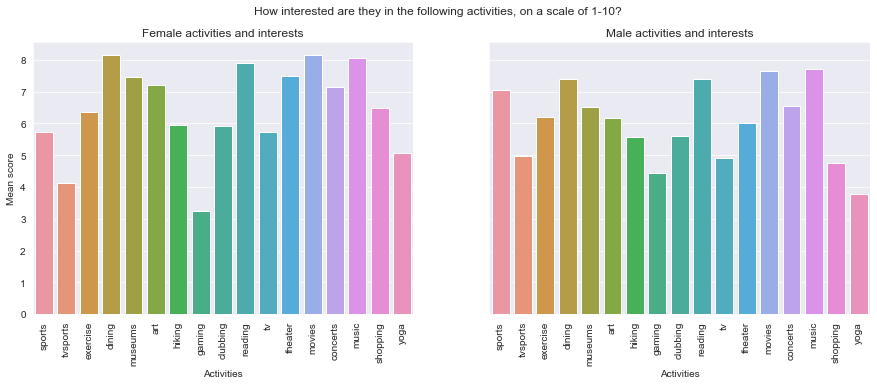

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig.suptitle('How interested are they in the following activities, on a scale of 1-10?')

sns.barplot(ax=axes[0], x=mean_activities.index, y='mean_female', data=mean_activities)
axes[0].set(xlabel='Activities', ylabel='Mean score', title='Female activities and interests')
axes[0].set_xticklabels(activities, rotation=90)

sns.barplot(ax=axes[1], x=mean_activities.index, y='mean_male', data=mean_activities)
axes[1].set(xlabel='Activities', ylabel='', title='Male activities and interests')
axes[1].set_xticklabels(activities, rotation=90);

# What are people looking for ?
## What are their main goal ?

Most people come to a speed dating for having fun and meeting new people. Very few actually come for getting a date or and looking for a long term relationship. It looks like men are more serious than women about it !

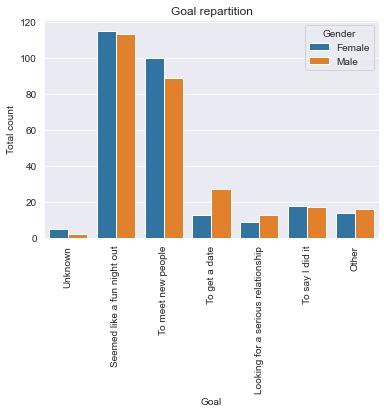

In [15]:
goals = ['Unknown', 'Seemed like a fun night out', 'To meet new people', 'To get a date', 'Looking for a serious relationship', 'To say I did it', 'Other']

ax = sns.countplot(data=unique_persons, x='goal', hue='gender')
ax.set(xlabel='Goal', ylabel='Total count', title='Goal repartition')
ax.set_xticklabels(goals, rotation=90)
ax.legend(title='Gender', labels=['Female', 'Male']);

## What are they expecting from a potential partner ?

For women, Intelligence is the most important attribute in a men, but men think that women are looking for the attractiveness first. 
However women think that the most important attribute for men is attractiveness and they are right !
Ambitions and having shared interests/hobbies are the least seeked attributes for both sex.

In [16]:
looking_for_columns = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1','amb1_1', 'shar1_1']
mean_looking_for = dataset.groupby(by='gender')[looking_for_columns].mean().T
mean_looking_for.columns = ['score_female', 'score_male']

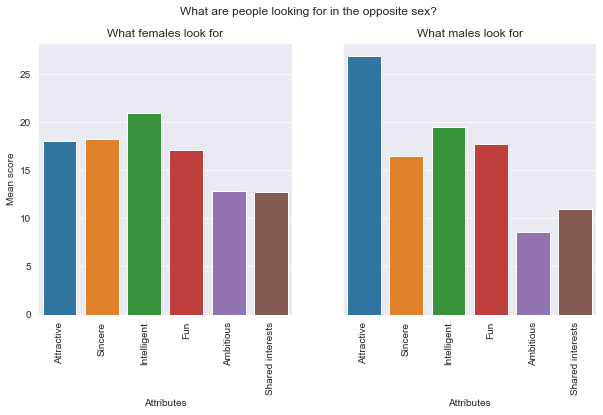

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.suptitle('What are people looking for in the opposite sex?')

sns.barplot(ax=axes[0], x=mean_looking_for.index, y='score_female', data=mean_looking_for)
axes[0].set(xlabel='Attributes', ylabel='Mean score', title='What females look for')
axes[0].set_xticklabels(['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared interests'], rotation=90)

sns.barplot(ax=axes[1], x=mean_looking_for.index, y='score_male', data=mean_looking_for)
axes[1].set(xlabel='Attributes', ylabel='', title='What males look for')
axes[1].set_xticklabels(['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared interests'], rotation=90);

In [18]:
opp_sex_looking_for_columns = ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1','amb2_1', 'shar2_1']
mean_opp_sex_looking_for = dataset.groupby(by='gender')[opp_sex_looking_for_columns].mean().T
mean_opp_sex_looking_for.columns = ['score_female', 'score_male']

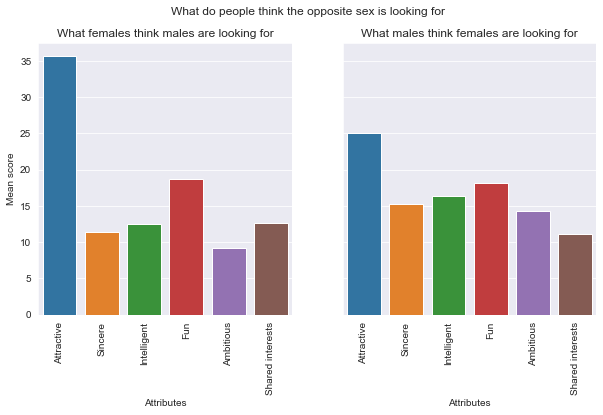

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.suptitle('What do people think the opposite sex is looking for')

sns.barplot(ax=axes[0], x=mean_opp_sex_looking_for.index, y='score_female', data=mean_opp_sex_looking_for)
axes[0].set(xlabel='Attributes', ylabel='Mean score', title='What females think males are looking for')
axes[0].set_xticklabels(['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared interests'], rotation=90)

sns.barplot(ax=axes[1], x=mean_opp_sex_looking_for.index, y='score_male', data=mean_opp_sex_looking_for)
axes[1].set(xlabel='Attributes', ylabel='', title='What males think females are looking for')
axes[1].set_xticklabels(['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared interests'], rotation=90);

# How to get a second date ?
## How often people match ?

Only 16.5% of the dates ends with a match !

In [85]:
# Create a unique id for each date
unique_dates = dataset.copy()
unique_dates.dropna(subset=['iid', 'pid', 'wave'], inplace=True)

In [89]:
def create_date_key(iid, pid, wave):
    list_key = [str(iid), str(int(pid))]
    list_key.sort()
    list_key.insert(0, str(wave))
    return '_'.join(list_key)


unique_dates['date_key'] = unique_dates.apply(lambda x : create_date_key(x['iid'], x['pid'], x['wave']),  axis=1)
unique_dates.drop_duplicates(subset=['date_key'], keep='first', inplace=True)

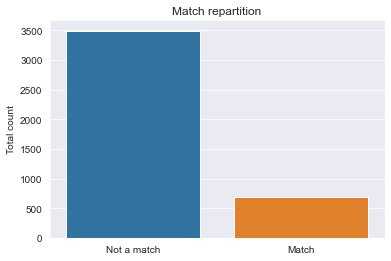

In [100]:
ax = sns.countplot(data=unique_dates, x='match')
ax.set(xlabel='', ylabel='Total count', title='Match repartition')
ax.set_xticklabels(['Not a match', 'Match']);

## What round people match at ?
It is more likely to get a match with people you meet in the first round. 

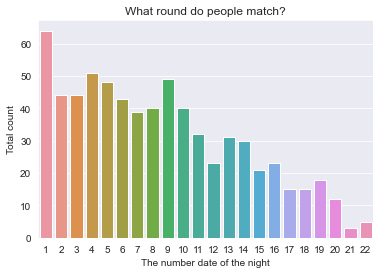

In [112]:
match = unique_dates[unique_dates['match'] == 1]

plt.figsize=(10,5)
ax = sns.countplot(data=match, x='order')
ax.set(xlabel='The number date of the night', ylabel='Total count', title='What round do people match?');

## Is attractiveness that important ?

Attractiveness is important ! This the number one attribute given for wanting a second date for both women and men ! Number 2 and 3 being Fun and Having shared interests.
It looks like having shared interests is more important than we initially thought !

In [20]:
scorecard_columns = ['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
corr_female = dataset.loc[dataset['gender'] == 0, scorecard_columns].corr().iloc[1:,[0]]
corr_male = dataset.loc[dataset['gender'] == 1, scorecard_columns].corr().iloc[1:,[0]]

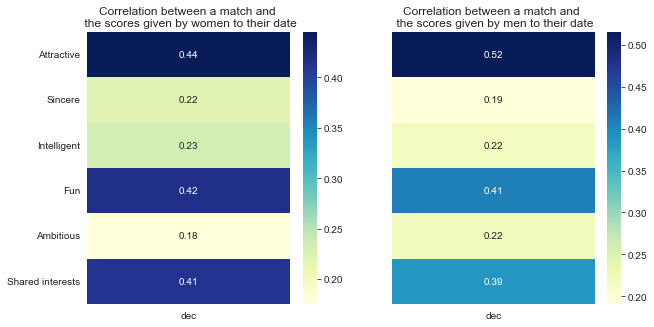

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
#fig.suptitle('Correlations between a match and attribute scores given after a date')

sns.heatmap(ax=axes[0], data=corr_female, cmap="YlGnBu", annot=True)
axes[0].set(ylabel='', xlabel='', title='Correlation between a match and \n the scores given by women to their date')
axes[0].set_yticklabels(['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared interests'], rotation=0)

sns.heatmap(ax=axes[1], data=corr_male, cmap="YlGnBu", annot=True)
axes[1].set(ylabel='', xlabel='', title='Correlation between a match and \n the scores given by men to their date')
axes[1].set_yticklabels(['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared interests']);

## Do you have to share the same interests ?
The dataset contains a column representing the correlation between participant’s and partner’s ratings of interests. We use it to see wether sharing the same interests is actually important to match.
It seems that people that matches have more in common that the others, but it is not very significant. 

In [119]:
unique_dates.groupby(by='match')['int_corr'].mean()

match
0    0.192163
1    0.217319
Name: int_corr, dtype: float64

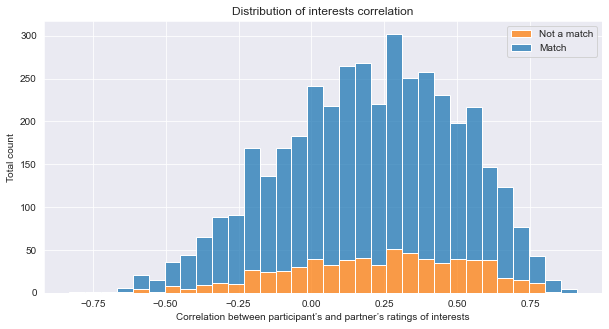

In [134]:
plt.figure(figsize=(10,5))
ax = sns.histplot(unique_dates, x="int_corr", hue='match', multiple="stack",)
ax.set(xlabel="Correlation between participant’s and partner’s ratings of interests", ylabel='Total count', title='Distribution of interests correlation')
ax.legend(title='', labels=['Not a match', 'Match']);

## Is racial background important for match ?
It looks like it is not an important factor to get a match. ALmost half matches are between people with differents races.

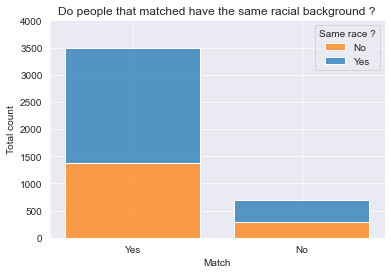

In [116]:
ax = sns.histplot(data=dataset, x = unique_dates['match'].astype('str'), hue='samerace', multiple="stack", shrink = 0.8);
ax.set(xlabel='Match', ylabel='Total count', title='Do people that matched have the same racial background ?')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(['Yes', 'No'])
ax.legend(title='Same race ?', labels=['No', 'Yes'])
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels((ax.get_yticks()).astype(int));